# Tema 1 - Călin Ionuț

## Ex. 1
Pentru început, creăm o funcție care citește din fișierul .csv și inserează în studenți numele acestora

In [20]:
import csv
import matplotlib.pyplot as plt
from faker import Faker
import numpy as np
import arviz as az

def read_csv(students):
    with open('studenti.csv',mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            students.append(row[0])


**Opțional** generăm un .csv cu nume de studenti folosind faker

In [21]:
fake_name_gen = Faker()

# To clean the file
open('studenti.csv',mode='w').write('')

for i in range(0,100):
    fake_name = fake_name_gen.name()
    with open('studenti.csv',mode='a') as csv_file:
        csv_file.write(fake_name + '\n')

Citim lista de studenți și generăm un sample aleatoriu de *n* studenți care nu se repetă. 

In [22]:
students = []
read_csv(students)
# print(students)

studs = np.random.choice(students,10,replace=False)
print(studs)

['Edward Dunn' 'Adriana Flynn' 'Lori Bell' 'Robin Davis' 'Nathan Parker'
 'Jennifer Griffith' 'Helen Robertson' 'Joseph Dawson'
 'Stephanie Smith DVM' 'Grant Williams']


## Ex 2
Urmarim dupa cate aruncari consecutive obținem stema, deci avem **distribuție geometrica**.


Valoarea medie a sumei:0.00295 


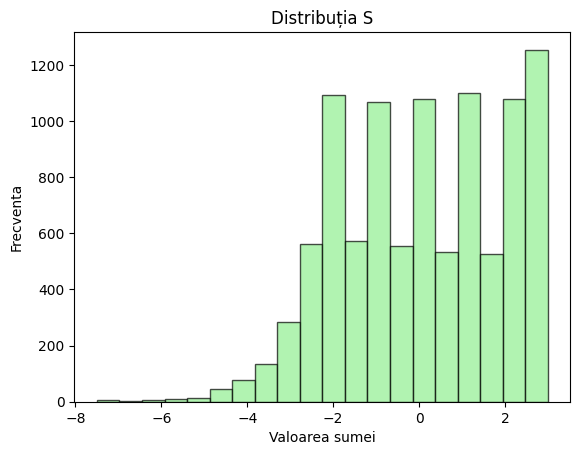

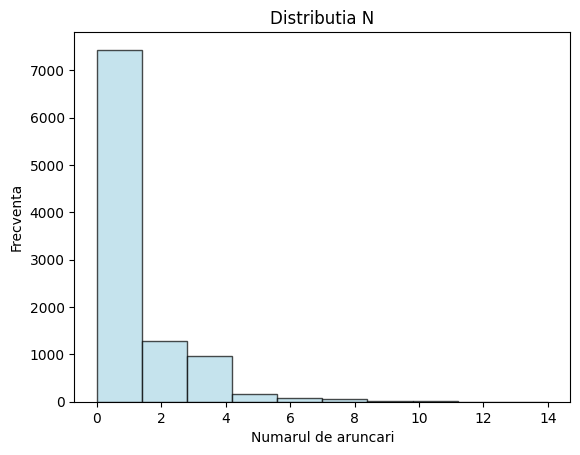

In [23]:
def game_simulation(p=0.5):
    sums = []
    throws = []
    for i in range(0,10_000):
        sum = 0
        throw = 0
        # 0 stema, 1 ban
        choice = np.random.choice([0,1],p=[p,1-p])
        while True:
            if choice == 0:
                sum += np.random.choice([3,2,1,0,-1,-2])
                break
            else:
                sum -= 0.5
                throw += 1
                choice = np.random.choice([0,1])
        sums.append(sum)
        throws.append(throw)
        
    print(f'Valoarea medie a sumei:{np.mean(sums)} ')
    
    plt.hist(sums, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Distribuția S')
    plt.xlabel('Valoarea sumei')
    plt.ylabel('Frecventa')
    plt.show()
    
    plt.hist(throws, bins=10, alpha=0.7, color='lightblue', edgecolor='black')
    plt.title('Distributia N')
    plt.xlabel('Numarul de aruncari')
    plt.ylabel('Frecventa')
    plt.show()
    
game_simulation()

Acum urmează doua simulari cu p = 0.3 si p = 0.7

Valoarea medie a sumei:-0.1853 


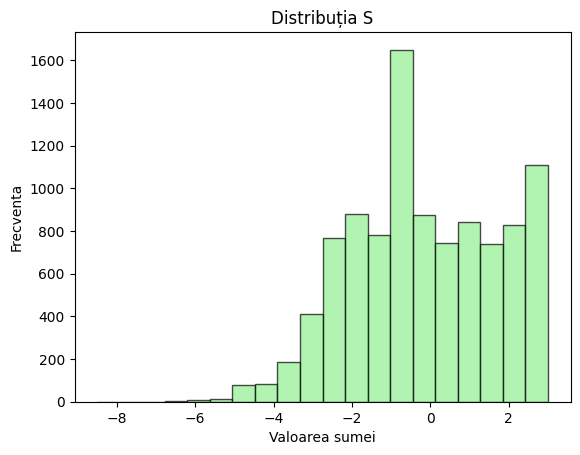

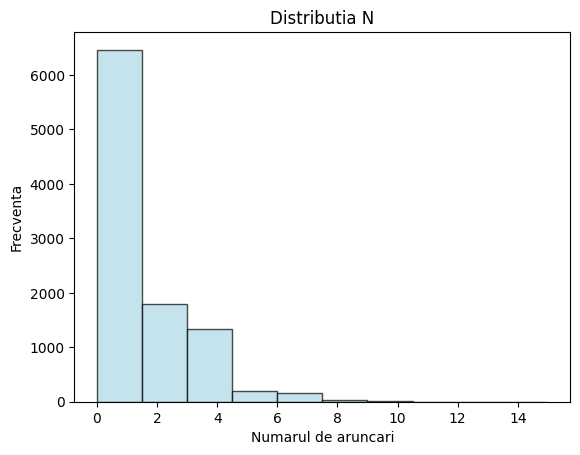

Valoarea medie a sumei:0.17045 


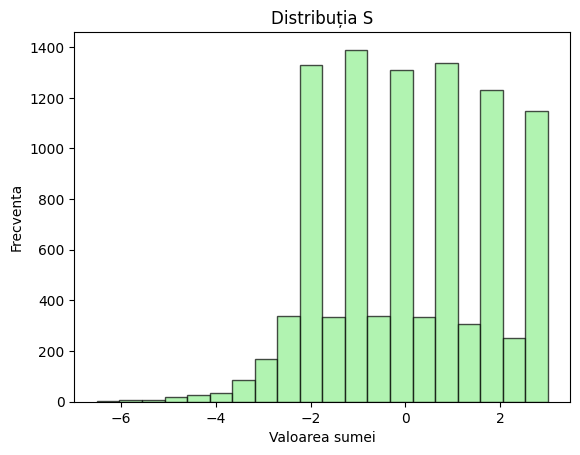

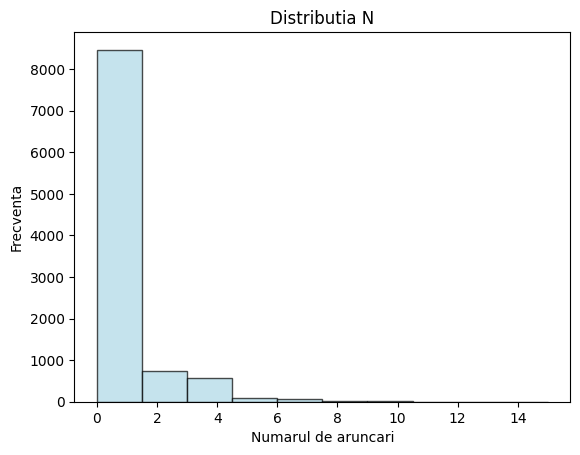

In [24]:
game_simulation(0.3)
game_simulation(0.7)

## Ex 3

Media: 0.22750987907203907
Deviatia standard: 0.24482389329568266


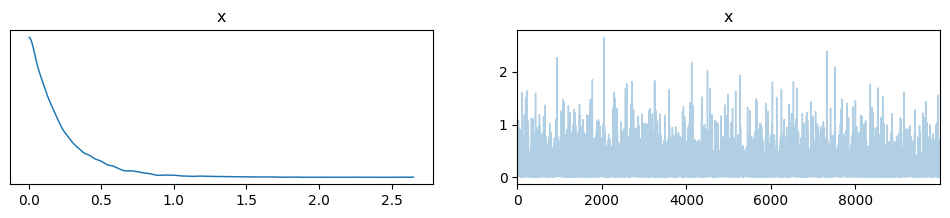

In [36]:
X = []

for i in range(0,10_000):
    lbd = np.random.choice([3,6,4],p=[3/13,6/13,4/13])
    X.append(np.random.exponential(scale=1/lbd))

mean = np.mean(X)
std_deviation = np.std(X)
print(f'Media: {mean}')
print(f'Deviatia standard: {std_deviation}')

az.plot_trace(np.array(X))
plt.show()

